<a href="https://colab.research.google.com/github/eireford/ConwayLifeTensorFlow/blob/master/ConWayLifeTensorflow_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conway's Game Of Life on TensorFlow

[Conways Game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is an example of a problem that is ["Embarassingly Parralel"](https://en.wikipedia.org/wiki/Embarrassingly_parallel), each step in it's calculation only requires a limited logically proximal subset of data. Tensorflow facilitates running this operation in a distributed fashion.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time

In [0]:
def default_config():
  return { 
      'grid_shape':  [1000,1000],
      # for reproducability reuse seed
      'seed': 1000,
      'preferred_size_inches': 18
   }

In [0]:
def random_uniform_grid(shape,seed):
  return tf.round(tf.random.uniform(shape=shape,dtype=tf.float32, seed=seed))

Use the default configuration and generate a grid of cells, randomly alive or dead.

In [5]:
config = default_config()
grid_shape, seed, preferred_size_inches, = config.values()
print(grid_shape)
print(seed)
print(preferred_size_inches)
grid = random_uniform_grid(grid_shape,seed)

[1000, 1000]
1000
18


Display the grid

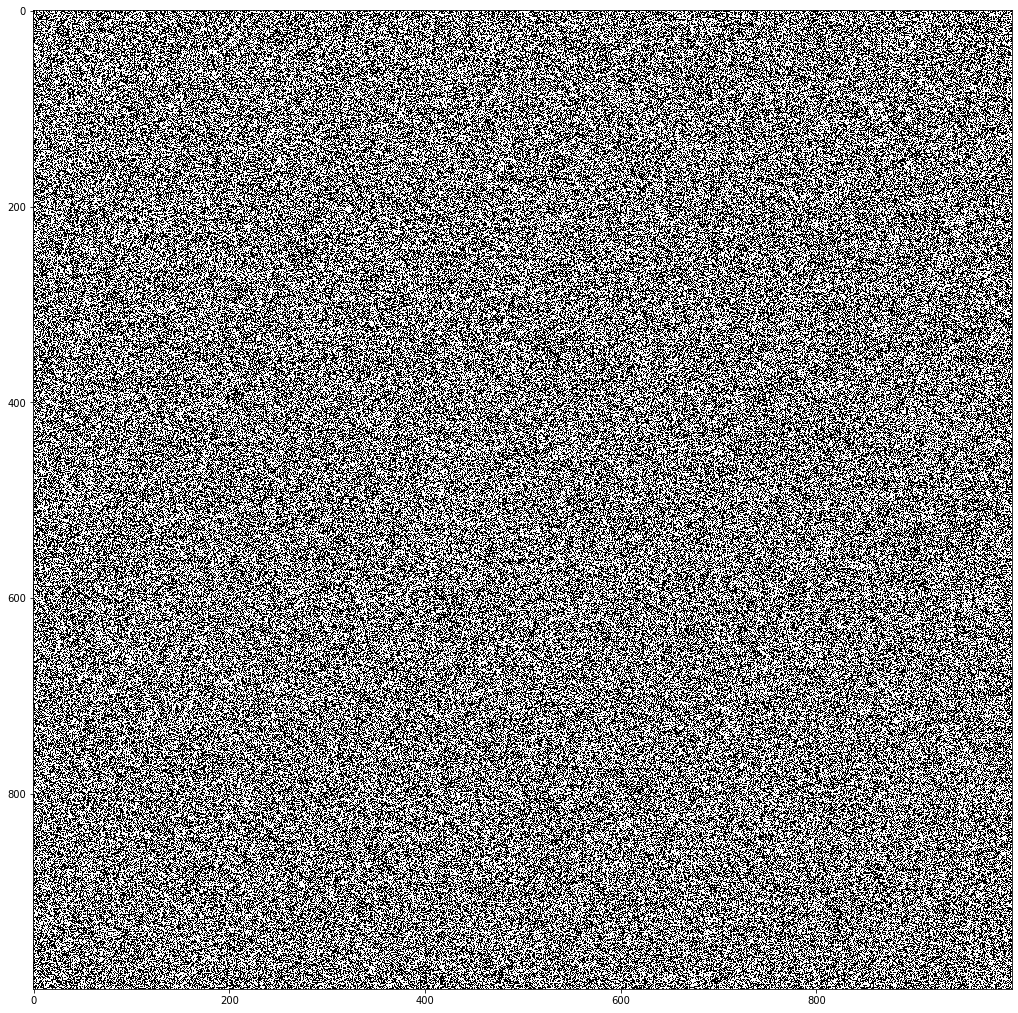

In [6]:
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
figure_1 = plt.imshow(grid,cmap='Greys',origin='upper',interpolation='nearest')

In [7]:
alive_total = tf.reduce_sum(grid)
ratio_alive = alive_total/(grid_shape[0]*grid_shape[1])
print("alive_total",int(alive_total))
print("alive_percent",float(ratio_alive*100))

alive_total 499547
alive_percent 49.9547004699707


In [0]:
livable_filter = tf.constant([
                                [1,1,1],
                                [1,10,1],
                                [1,1,1]
                                ],dtype=tf.float32,name='neighbors_filter')
def convolve_for_density(x):
  kernal = tf.reshape(livable_filter, [3,3,1,1], name='kernel')
  image = tf.reshape(x,[1,grid_shape[0],grid_shape[1],1], name='image')
  denisty_map = tf.reshape(tf.nn.conv2d(image,kernal,[1,1,1,1],"SAME"),grid_shape)
  return denisty_map  

In [0]:
def liveness_test(x):
  return tf.cast(tf.where(((x == 3)|(x == 12)|(x == 13)),1,0),dtype=tf.float32)

In [0]:
#running_state = convolve_for_density(grid)
#tf.print(running_state,summarize=-1)
#plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
#figure_2 = plt.imshow(tf.slice(running_state,(0,0),(grid_shape[0],grid_shape[1])),cmap='Greys',origin='upper',interpolation='nearest')

In [0]:
def population_report(x):
  alive_total = tf.reduce_sum(x)
  ratio_alive = alive_total/(grid_shape[0]*grid_shape[1])
  print("alive_total",int(alive_total))
  print("alive_percent",float(ratio_alive*100))

In [0]:
def show(x):
  plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
  figure_z = plt.imshow(tf.slice(x,(0,0),(grid_shape[0],grid_shape[1])),cmap='Greys',origin='upper',interpolation='nearest') 

In [0]:
def life_hash(x):
  h1 = tf.reduce_sum(x,0)
  h2 = tf.reduce_sum(x,1)
  h3 = tf.concat([h1,h2],0).numpy()
  return tuple(h3)

In [0]:
running_state = grid

0
alive_total 499547
alive_percent 49.9547004699707
100
alive_total 93198
alive_percent 9.31980037689209
200
alive_total 74686
alive_percent 7.468599796295166
300
alive_total 64081
alive_percent 6.40809965133667
400
alive_total 56876
alive_percent 5.687600135803223
500
alive_total 52509
alive_percent 5.250899791717529
600
alive_total 48916
alive_percent 4.891600131988525
700
alive_total 47193
alive_percent 4.719299793243408
800
alive_total 44668
alive_percent 4.466800212860107
900
alive_total 44047
alive_percent 4.40470027923584
1000
alive_total 42313
alive_percent 4.231299877166748
1100
alive_total 42749
alive_percent 4.274899959564209
1200
alive_total 41192
alive_percent 4.119199752807617
1300
alive_total 39628
alive_percent 3.9628000259399414
1400
alive_total 37780
alive_percent 3.7780001163482666
1500
alive_total 36812
alive_percent 3.6812000274658203
1600
alive_total 36709
alive_percent 3.6708998680114746
1700
alive_total 36165
alive_percent 3.616499900817871
1800
alive_total 3545

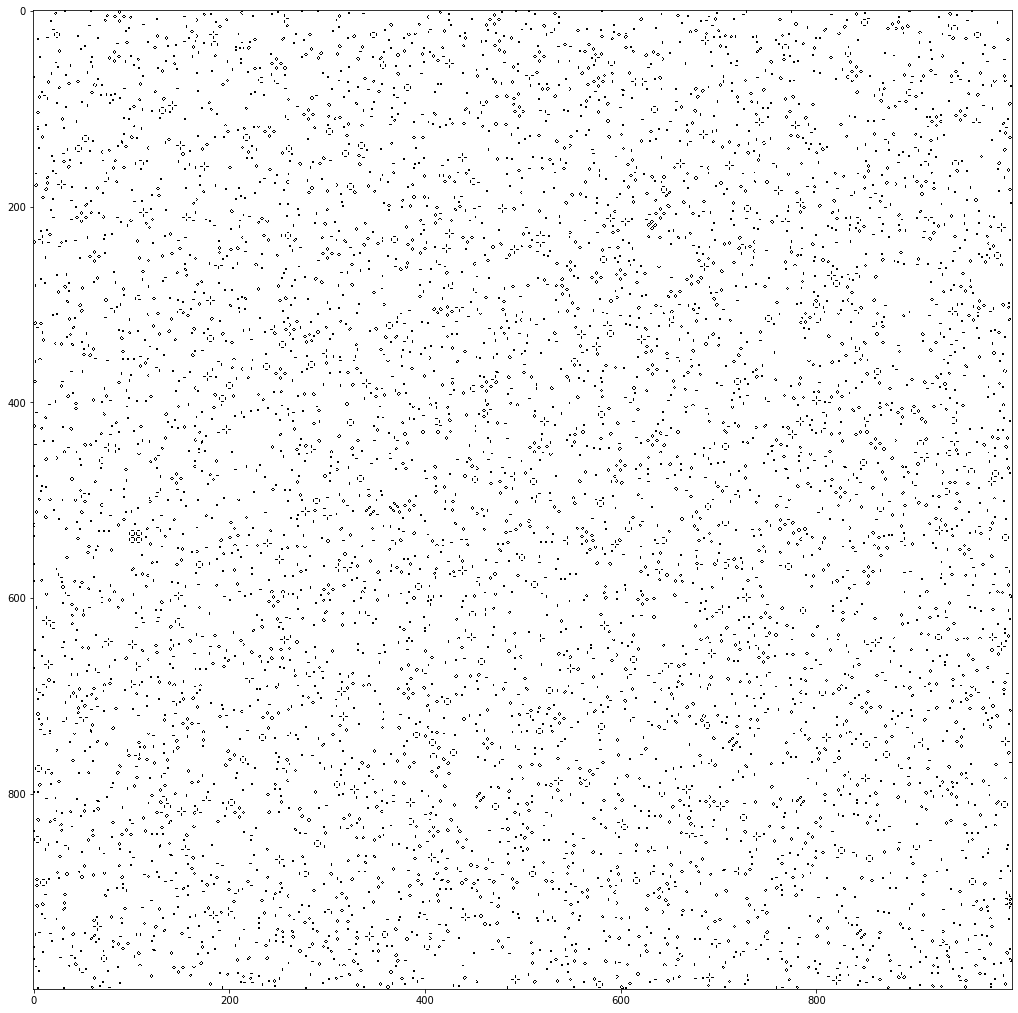

In [18]:
#show(running_state)
prior_hashes = set()
for i in range(10000):
  #print("**************************************************")
  if i%100 == 0:
    print(i)
    population_report(running_state)
  running_state = convolve_for_density(running_state)
  running_state = liveness_test(running_state)
  latest_hash = life_hash(running_state)
  if tuple(latest_hash) in prior_hashes:
    print("Pattern Repeated")
    break
  prior_hashes.add(latest_hash)
population_report(running_state)
show(running_state)

Credits
 - https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
 - https://nostarch.com/download/samples/PythonPlayground_sampleCh3.pdf
 - https://databricks.com/tensorflow/custom-functions
 - http://drsfenner.org/blog/2015/07/game-of-life-in-numpy-preliminaries-2/